Task_6,2

In [161]:
import numpy as np
import pandas as pd
from  IPython.display import display 
import visuals as va
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [162]:
%matplotlib inline

In [163]:
data=pd.read_csv(r'C:\Users\TECH - PLANET\Downloads\Telegram Desktop\insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [164]:
#children column has a large number of null value
outcome=data['charges']
features=data.drop('charges',axis=1, )
data.drop('children',axis=1 , inplace=True)

display (features.head)


<bound method NDFrame.head of       age     sex     bmi  children smoker     region
0      19  female  27.900         0    yes  southwest
1      18    male  33.770         1     no  southeast
2      28    male  33.000         3     no  southeast
3      33    male  22.705         0     no  northwest
4      32    male  28.880         0     no  northwest
...   ...     ...     ...       ...    ...        ...
1333   50    male  30.970         3     no  northwest
1334   18  female  31.920         0     no  northeast
1335   18  female  36.850         0     no  southeast
1336   21  female  25.800         0     no  southwest
1337   61  female  29.070         0    yes  northwest

[1338 rows x 6 columns]>

In [165]:
def accuracy_score(truth, pred):
    if len(truth)==len(pred):
        return "Predictions have an accuracy of {:.2f}%.".format((truth==pred).mean()*100)
    else:
        return "Number of predictions does not match number of outcomes!"
predictions = pd.Series(np.ones(5, dtype = float))
print (predictions)
print(outcome[:5])
print((3/5)*100)
print(accuracy_score(outcome[:5], predictions))

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64
60.0
Predictions have an accuracy of 0.00%.


In [166]:
dtypes=data.dtypes
unique_values=data.nunique()
pd.DataFrame({'Data_Type':dtypes , 'Unique Values': unique_values}).T

,age,sex,bmi,smoker,region,charges
Data_Type,int64,object,float64,object,object,float64
Unique Values,47,2,548,2,4,1337


In [167]:
cols=["sex","smoker","region"]
data[cols]=data[cols].astype('category')
df_type=pd.DataFrame(data.dtypes).T
print(df_type)

     age       sex      bmi    smoker    region  charges
0  int64  category  float64  category  category  float64


In [168]:
null=data.isnull().sum()
ratio= null/data.shape[0]
pd.DataFrame({'Null_sum':null, 'Ratio':ratio}).T

,age,sex,bmi,smoker,region,charges
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
data.duplicated().sum()

np.int64(1)

In [170]:
data=data.drop_duplicates()

In [171]:
data.head()


,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


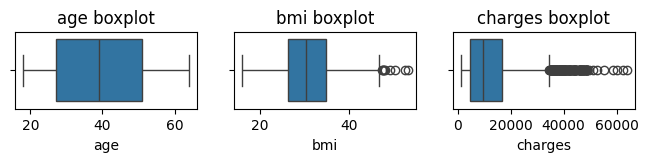

In [172]:
num_cols=data.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i, col in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    sns.boxplot(data[col],orient="h")
    plt.title(f"{col} boxplot")


In [173]:
for col in num_cols:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    Lower_Fence=Q1-1.5*IQR
    Upper_Fence=Q3+1.5*IQR
    Lower_Outliners=data[data[col]<Lower_Fence][col].values
    Upper_Outliner=data[data[col]>Upper_Fence][col].values
    data[col].replace(Lower_Outliners,Lower_Fence, inplace=True)
    data[col].replace(Upper_Outliner,Upper_Fence, inplace=True)

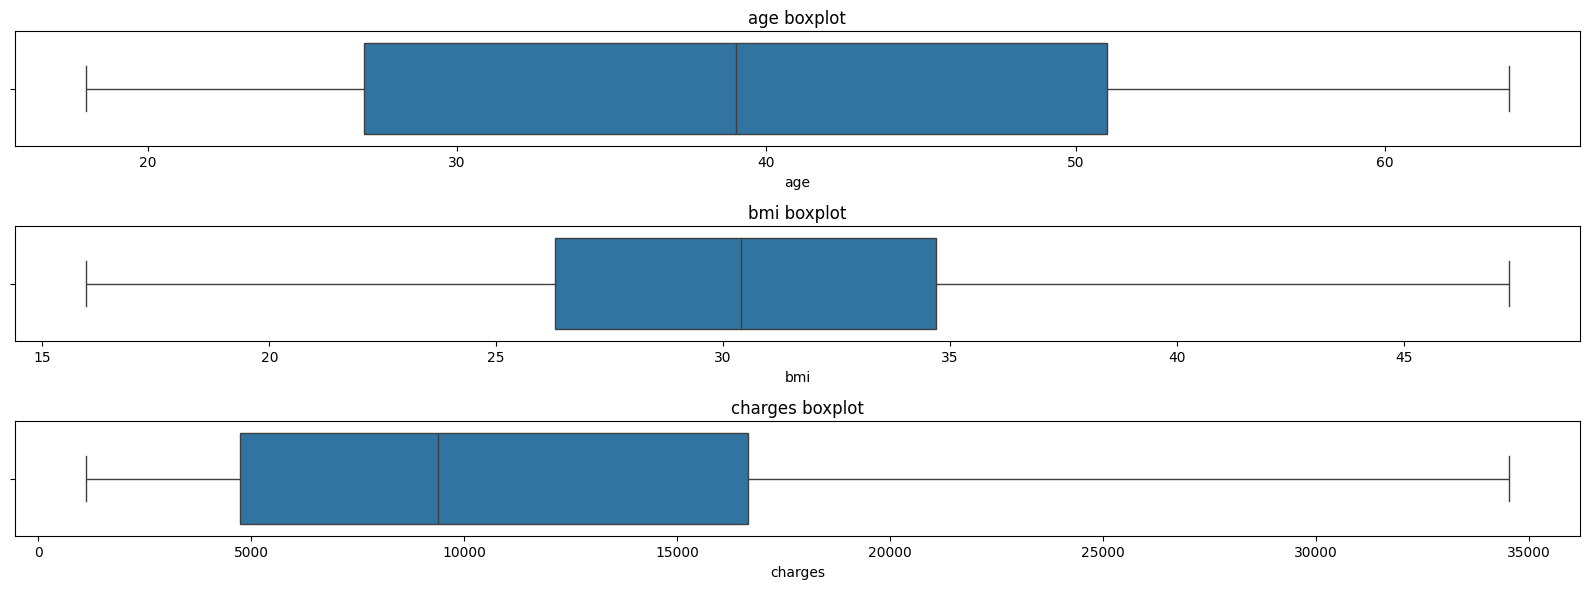

In [174]:
num_cols=data.select_dtypes(include=["number"]).columns
plt.figure(figsize=(16,len(num_cols)*2))
for i, col in enumerate(num_cols,1):
    plt.subplot(len(num_cols),1,i)
    sns.boxplot(x=data[col],orient="h")
    plt.title(f"{col} boxplot")
    plt.tight_layout()
    plt.show

In [175]:
data.describe()

,age,bmi,charges
count,1337.000000,1337.000000,1337.000000
mean,39.222139,30.650247,12491.159952
std,14.044333,6.059655,10165.511950
min,18.000000,15.960000,1121.873900
25%,27.000000,26.290000,4746.344000
50%,39.000000,30.400000,9386.161300
75%,51.000000,34.700000,16657.717450
max,64.000000,47.315000,34524.777625


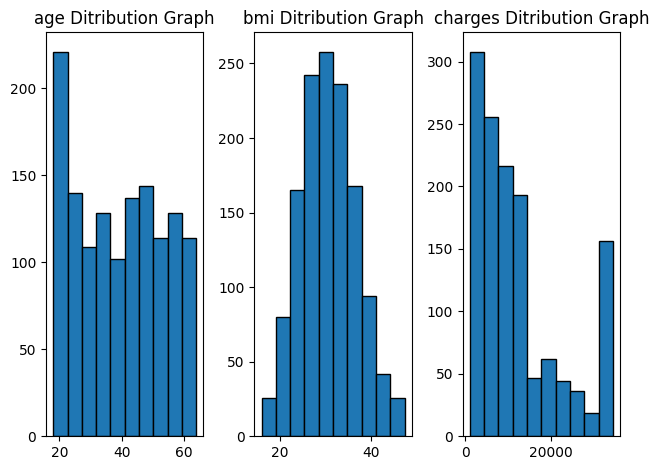

In [176]:
num_cols= data.select_dtypes("number").columns
plt.Figure(figsize=(16,len(num_cols)*2))
for i,col in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    plt.hist(data[col],edgecolor="black")
    plt.title(f"{col} Ditribution Graph")
    plt.tight_layout()

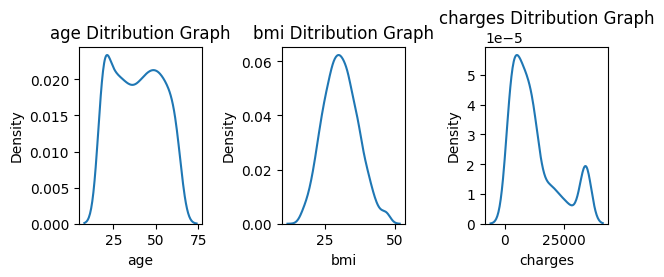

In [177]:
num_cols= data.select_dtypes("number").columns
plt.Figure(figsize=(20,len(num_cols)*12))
for i,col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.kdeplot(data[col])
    plt.title(f"{col} Ditribution Graph")
    plt.tight_layout()
  

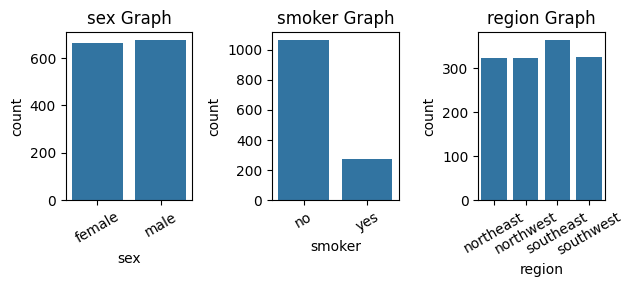

In [178]:
cat_cols= data.select_dtypes("category").columns
plt.Figure(figsize=(15,len(num_cols)*2))
for i,col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col,data=data)
    plt.title(f"{col} Graph")
    plt.subplots_adjust(hspace=0.5,wspace=0.3)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show
  

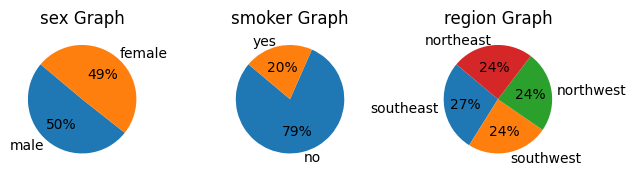

In [179]:
cat_cols= data.select_dtypes("category").columns
plt.Figure(figsize=(15,len(num_cols)*2))
for i,col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    unique=data[col].value_counts()
    count=unique.values
    categories=unique.index
    plt.pie(count,labels=categories,startangle=140,autopct='%1.1d%%')
    plt.title(f"{col} Graph")
    plt.subplots_adjust(hspace=0.5,wspace=0.3)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show

Text(0.5, 1.0, 'age to bmi scattering plot')

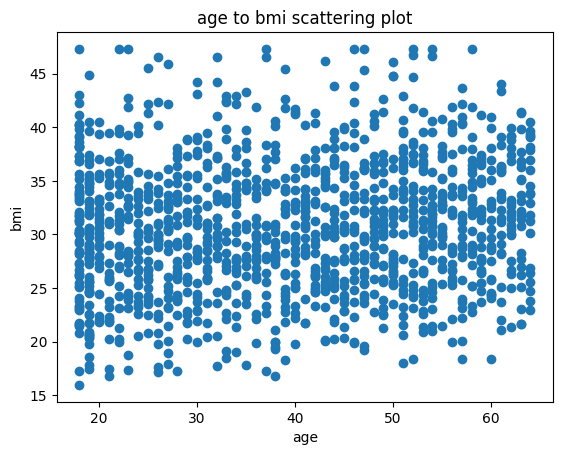

In [185]:
plt.Figure(figsize=(15,len(num_cols)*2))
plt.scatter(data['age'],data['bmi'])
plt.xlabel('age')
plt.ylabel('bmi')
plt.title('age to bmi scattering plot')

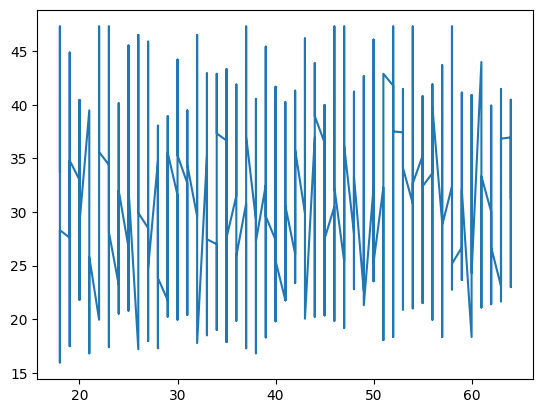

In [188]:
sort_data=data.sort_values(by='age')
plt.Figure(figsize=(2,2))
plt.plot(sort_data['age'],sort_data['bmi'])

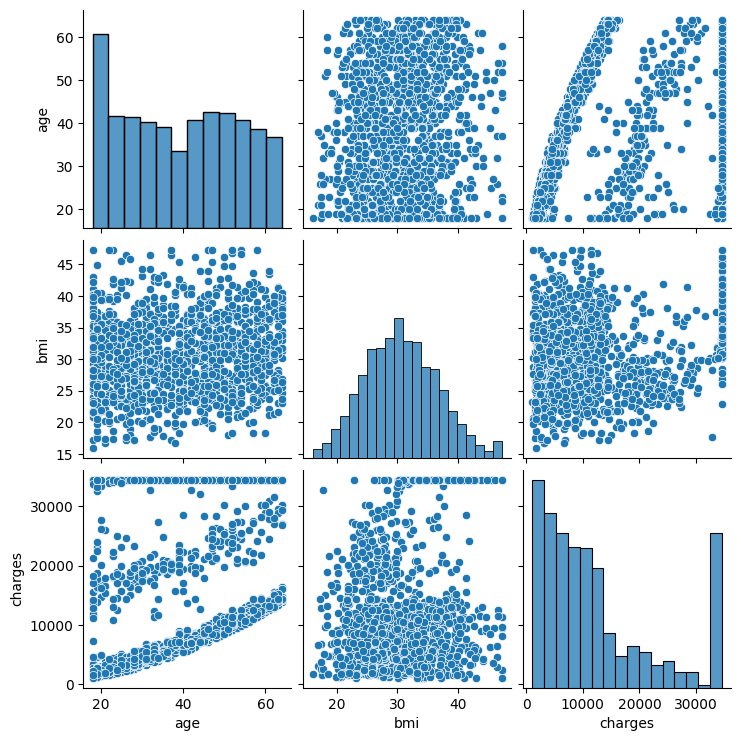

In [187]:
sns.pairplot(data)

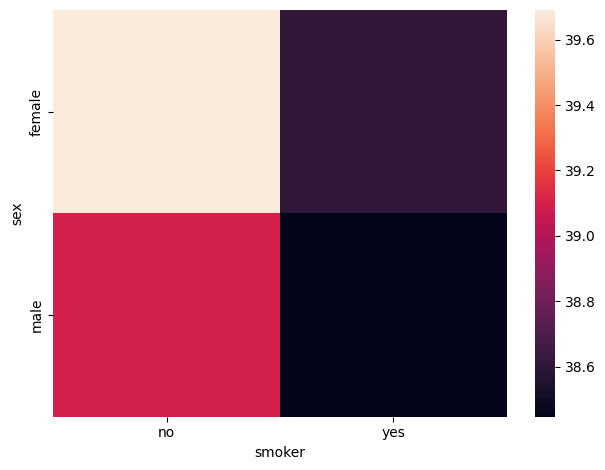

In [193]:
plt.Figure(figsize=(4,4))
color_plot=data.pivot_table(index='sex', columns='smoker',values='age' )
sns.heatmap(color_plot)
plt.tight_layout()